In [1]:
from scipy.spatial import distance as dist
from imutils.video import FileVideoStream
from imutils.video import VideoStream
from imutils import face_utils
import numpy as np
import argparse
import imutils
import time
import dlib
import cv2

In [2]:
 def eye_aspect_ratio(eye):
    # compute the euclidean distances between the two sets of
    # vertical eye landmarks (x, y)-coordinates
    A = dist.euclidean(eye[1], eye[5])
    B = dist.euclidean(eye[2], eye[4])

    # compute the euclidean distance between the horizontal
    # eye landmark (x, y)-coordinates
    C = dist.euclidean(eye[0], eye[3])

    # compute the eye aspect ratio
    ear = (A + B) / (2.0 * C)

    # return the eye aspect ratio
    return ear

In [3]:

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("E:/eye_blink_detection/shape_predictor_68_face_landmarks.dat")

In [4]:
(lStart, lEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
(rStart, rEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

In [5]:
EYE_AR_THRESH = 0.18
EYE_AR_CONSEC_FRAMES = 3

# initialize the frame counters and the total number of blinks
COUNTER = 0
TOTAL = 0

In [6]:
font = cv2.FONT_HERSHEY_PLAIN

#cap = cv2.VideoCapture(0)
#while True:
   # _, frame = cap.read()
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #faces = detector(frame)
   # print(faces)
    #for face in faces:
        #x, y = face.left(), face.top()
        #x1, y1 = face.right(), face.bottom()
        #cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)

        #landmarks = predictor(gray, face)
        #print(landmarks)
        #landmarks= face_utils.shape_to_np(landmarks)
        #take co-ordinates of two eyes and then measure ratio
        #leftEye = landmarks[lStart:lEnd]
       # rightEye = landmarks[rStart:rEnd]
        #leftEAR = eye_aspect_ratio(leftEye)
        #rightEAR = eye_aspect_ratio(rightEye)
        
        # average the eye aspect ratio together for both eyes
        #ear_ratio = (leftEAR + rightEAR) / 2.0
        #print(ear_ratio)
        
        # visualize each of the eyes
        #leftEyeHull = cv2.convexHull(leftEye)
        #rightEyeHull = cv2.convexHull(rightEye)
        #cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
        #cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)
        
        #if ear_ratio<0.17:
            #cv2.putText(frame, "Eyelids_close", (40, 140), font, 2, (255, 0, 0),2)
        
        #if ear_ratio> EYE_AR_THRESH:
            #COUNTER += 1
        #else:
            #if COUNTER >= EYE_AR_CONSEC_FRAMES:
                #TOTAL += 1

            #reset the eye frame counter
            #COUNTER = 0
        #cv2.putText(frame, "Blinks: {}".format(TOTAL), (10, 30),
                     #cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        #cv2.putText(frame, "EAR: {:.2f}".format(ear_ratio), (300, 30),
                    #cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)   
            

    #cv2.imshow("Frame", frame)

    #key = cv2.waitKey(1)
    #if key == 27:
        #break


In [7]:
#...........video check...........................................
import tensorflow as tf 
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:

#print(output_details)

In [9]:
def land(img):
    
    img=cv2.resize(img,(160,160))
    #print(img.shape)
    img1=img.copy()
    #img=img/255
    img=[img]
    img = np.concatenate([arr[np.newaxis] for arr in img])
    #print(img.shape)
    #print(img.shape)
    img=img.astype("int32")
    
    interpreter = tf.lite.Interpreter(model_path="D:/eye-blink-modified/keypoints-1.tflite")
    interpreter.allocate_tensors()
     # Get input and output tensors.
    input_details = interpreter.get_input_details()
    #print(input_details)
    output_details = interpreter.get_output_details()
    #input_shape = input_details[0]['shape']
    #input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    tensor_index = interpreter.get_input_details()[0]['index']
    input_tensor_z= tf.convert_to_tensor(img, np.float32)
    interpreter.set_tensor(tensor_index, input_tensor_z)


    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output_details[2]['index'])
    #print(output_data)
    #landmarks=output_data
    return output_data 

In [10]:
from math import hypot

def midpoint(p1 ,p2,p3,p4):
    return int((p1 + p3)/2), int((p2 + p4)/2)


def get_eye(eye_points,landmarks,img1):
    
    #..........................for both_eye........................
    x_index = (eye_points[0])*2
    y_index = (eye_points[0])*2+1
    
    left_point= ((landmarks[0][x_index]*img1.shape[1]).astype(int),
                (landmarks[0][y_index]*img1.shape[0]).astype(int))
    right_point=((landmarks[0][(eye_points[3])*2]*img1.shape[1]).astype(int),
                (landmarks[0][(eye_points[3])*2+1]*img1.shape[0]).astype(int))
    
    center_top = midpoint((landmarks[0][(eye_points[1])*2]*img1.shape[1]).astype(int),
                          (landmarks[0][(eye_points[1])*2+1]*img1.shape[0]).astype(int),
                          (landmarks[0][(eye_points[2])*2]*img1.shape[1]).astype(int),
                          (landmarks[0][(eye_points[2])*2+1]*img1.shape[0]).astype(int),

                                     )
    center_bottom = midpoint((landmarks[0][(eye_points[5])*2]*img1.shape[1]).astype(int),
                             (landmarks[0][(eye_points[5])*2+1]*img1.shape[0]).astype(int),
                             (landmarks[0][(eye_points[4])*2]*img1.shape[1]).astype(int),
                              (landmarks[0][(eye_points[4])*2+1]*img1.shape[0]).astype(int),
                            )
    #print(left_point,right_point,center_top,center_bottom)
    hor_line_lenght = hypot((left_point[0] - right_point[0]), (left_point[1] - right_point[1]))
    ver_line_lenght = hypot((center_top[0] - center_bottom[0]), (center_top[1] - center_bottom[1]))

    ratio = hor_line_lenght / ver_line_lenght
    #print(ratio)
    
    return ratio


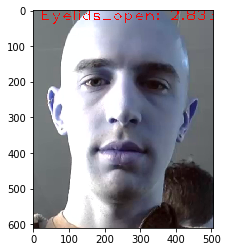

In [11]:
import dlib
detector = dlib.get_frontal_face_detector()

font = cv2.FONT_HERSHEY_PLAIN
face_cascade = cv2.CascadeClassifier('D:/haarcascade_frontalface_default.xml')

capture = cv2.VideoCapture("E:/eye_blink_detection/blink_detection_demo.mp4")
frames_num = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
img1=[]

#cap = cv2.VideoCapture(0)
#while True:
for i in range(frames_num):
   # _, frame = cap.read()
    capture.grab()
    if i % 10 != 0:
        continue
    success, frame = capture.retrieve()
    if not success:
        continue
    # Detect the faces
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(frame,1)
    #faces=face_cascade(frame)
    #print(faces)
    #print(len(faces))
    #if len(faces)>1:
    for d in faces:
        #print(d.top(),d.bottom())
        img=frame[d.top()-75:d.bottom()+150,d.left()-70:d.right()+50]
        plt.imshow(img)
        landmarks=land(img)
        left_eye = get_eye([36,37,38, 39, 40, 41],landmarks,img)
        right_eye=get_eye([42, 43, 44, 45, 46,47], landmarks,img)
        blinking_ratio = (left_eye + right_eye) / 2
        
        font = cv2.FONT_HERSHEY_PLAIN
        if blinking_ratio>5.50:
            cv2.putText(img,"Take_screenshot: {}".format(blinking_ratio), (20, 30), font,3, (255, 0, 0),2)
        elif blinking_ratio<5.50:
            cv2.putText(img, "Eyelids_open: {}".format(blinking_ratio), (20, 30), font,3, (255, 0, 0),2)
    img1.append(img)
    plt.imshow(img) 
        #print( blinking_ratio)
    #cv2.imshow("Frame", frame)

    #key = cv2.waitKey(1)
    #if key == 27:
        #break


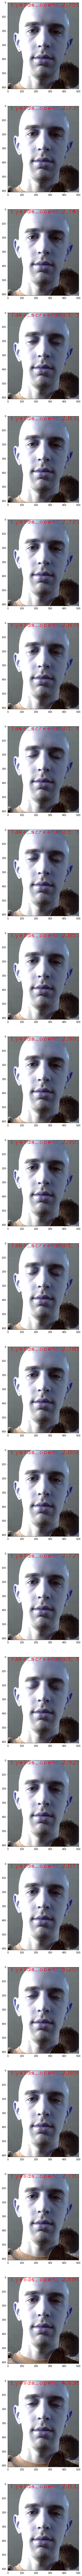

In [12]:
#img=img[0:30]
img=img1
#print(len(img))
n=len(img)
f = plt.figure(figsize=(200, 200))
for i in range(n):
    # Debug, plot figure
    #img=plt.imread(i)
    f.add_subplot(n,1,i+1)
    plt.imshow(img[i])
        #cv2.imshow("Frame", frame)
plt.show(block=True)